In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/ADMIN/Desktop/python jupyter/Deep Learning/csv files/placement.csv')

In [3]:
df.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


In [5]:
df.shape

(100, 3)

<Axes: xlabel='cgpa', ylabel='resume_score'>

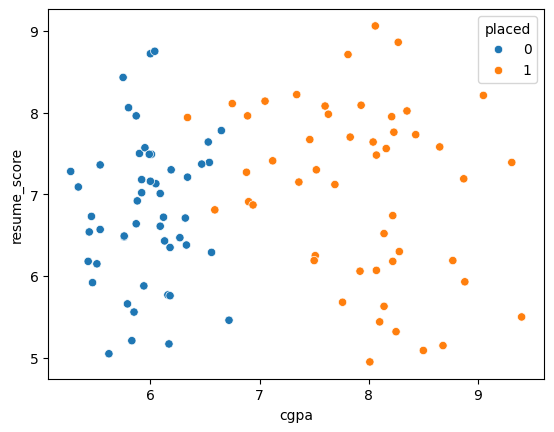

In [6]:
sns.scatterplot(data=df,x='cgpa',y='resume_score',hue='placed')

In [9]:
X = df.drop(['placed'],axis=1)
Y = df['placed']

In [11]:
from sklearn.linear_model import Perceptron
per = Perceptron()

In [12]:
per.fit(X,Y)

Perceptron()

In [13]:
per.coef_

array([[ 40.26, -36.  ]])

In [14]:
per.intercept_

array([-25.])

In [17]:
from mlxtend.plotting import plot_decision_regions

C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

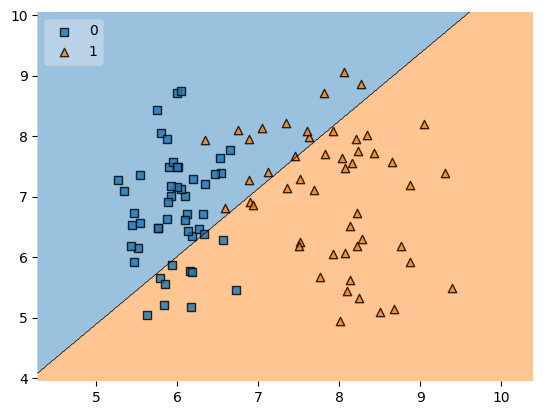

In [18]:
plot_decision_regions(X.values,Y.values,clf=per,legend=2)

# PERCEPTRON TRICK

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [7]:
X,Y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,
                          hypercube=False,class_sep=10)

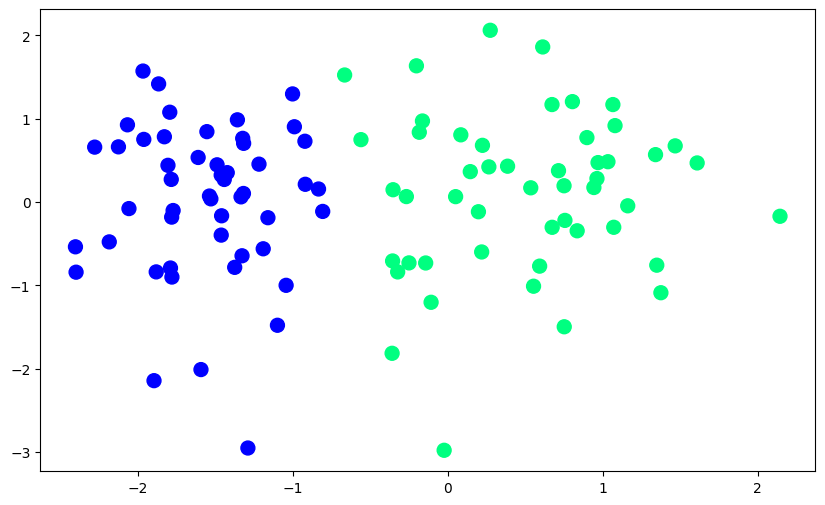

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=Y,cmap='winter',s=100)

In [12]:
def perceptron(X,Y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.01

    for i in range(1000):
        j = np.random.randint(0,100)
        Y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(Y[j] - Y_hat)*X[j]
    return weights[0],weights[1:]

In [13]:
def step(z):
    return 1 if z>0 else 0

In [14]:
intercept_,coef_ = perceptron(X,Y)

In [16]:
print(coef_)
print(intercept_)

[1.32053193 0.28459736]
0.9299999999999999


In [20]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [21]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

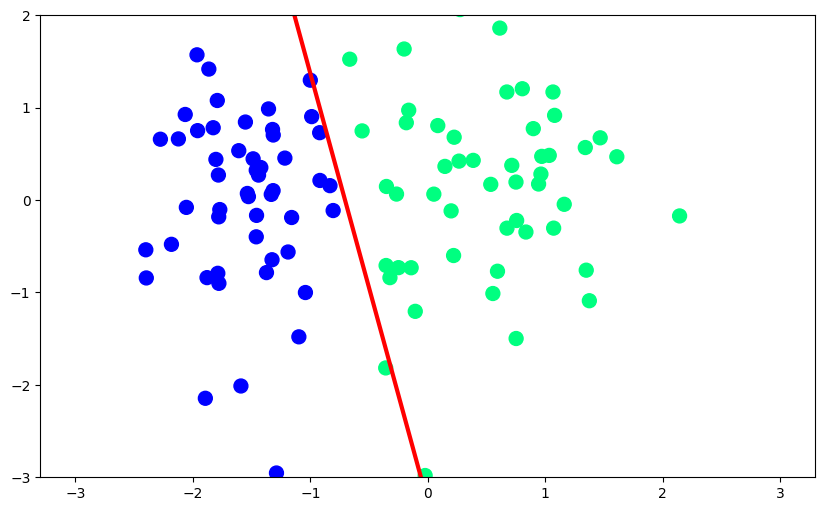

In [23]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=Y,cmap='winter',s=100)
plt.ylim(-3,2)

# PERCEPTRON LOSS FUNCTION

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [4]:
X,Y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,
                          hypercube=False,class_sep=15)

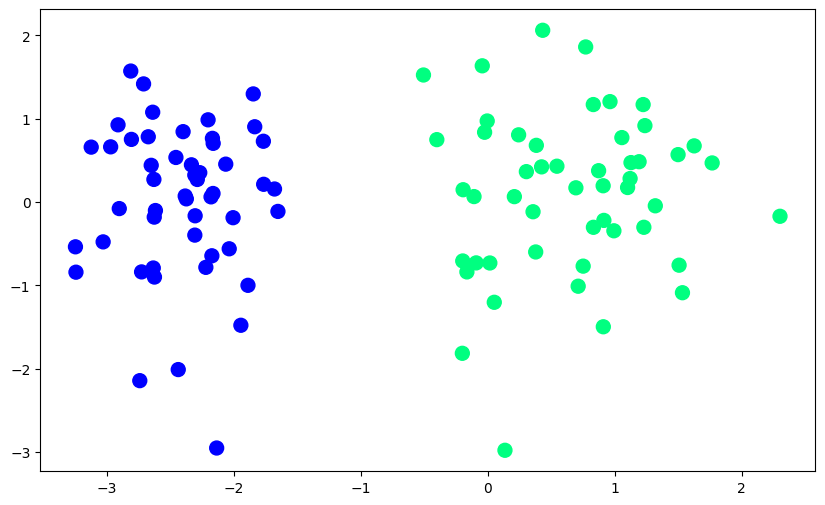

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=Y,cmap='winter',s=100)

In [8]:
def perceptron(X,Y):
    w1=w2=b=1
    lr=0.1

    for j in range(100):

        for i in range(X.shape[0]):

            z = w1*X[i][0] + w2*X[i][1] + b
    
            if z *Y[i] < 0:
                w1 = w1 + lr*Y[i]*X[i][0]
                w2 = w2 + lr*Y[i]*X[i][1]
                b = b + lr*Y[i]

    return w1,w2,b

In [9]:
w1,w2,b = perceptron(X,Y)

In [10]:
print(w1)
print(w2)
print(b)

1.006638570722407
0.22215119727529098
1.3000000000000003


In [11]:
m = -(w1/w2)
c = -(b/w2)

(-3.0, 2.0)

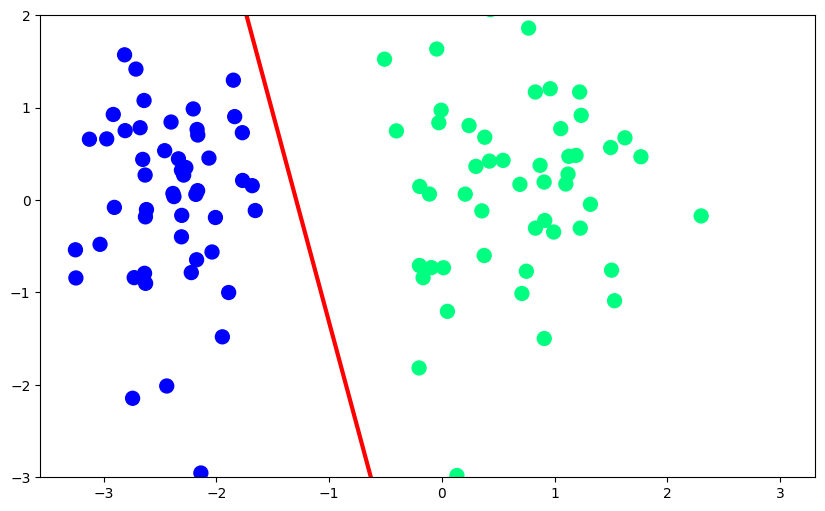

In [12]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + c

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=Y,cmap='winter',s=100)
plt.ylim(-3,2)

# PROBLEM WITH PERCEPTRON

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [3]:
or_data = pd.DataFrame()
and_data = pd.DataFrame()
xor_data = pd.DataFrame()

In [6]:
or_data['input1'] = [1,1,0,0]
or_data['input2'] = [1,0,1,0]
or_data['output'] = [1,1,1,0]

In [7]:
and_data['input1']= [1,1,0,0]
and_data['input2']= [1,0,1,0]
and_data['output']= [1,0,0,0]

In [8]:
xor_data['input1'] = [1,1,0,0]
xor_data['input2'] = [1,0,1,0]
xor_data['output'] = [0,1,1,0]

In [10]:
or_data

,input1,input2,output
0,1,1,1
1,1,0,1
2,0,1,1
3,0,0,0


<Axes: xlabel='input1', ylabel='input2'>

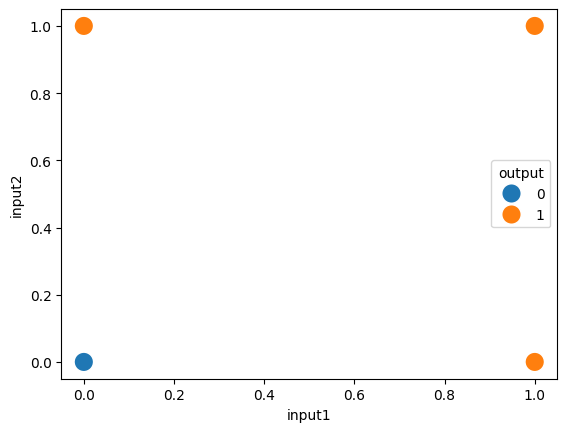

In [15]:
sns.scatterplot(x=or_data['input1'], y=or_data['input2'], hue=or_data['output'], s=200)

In [11]:
xor_data

,input1,input2,output
0,1,1,0
1,1,0,1
2,0,1,1
3,0,0,0


<Axes: xlabel='input1', ylabel='input2'>

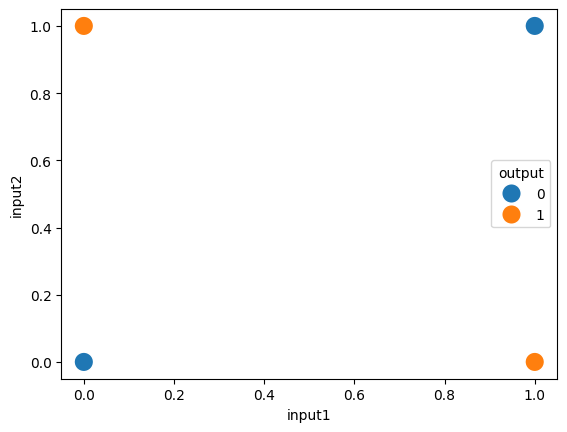

In [16]:
sns.scatterplot(x=xor_data['input1'], y=xor_data['input2'], hue=xor_data['output'], s=200)

In [9]:
and_data

,input1,input2,output
0,1,1,1
1,1,0,0
2,0,1,0
3,0,0,0


<Axes: xlabel='input1', ylabel='input2'>

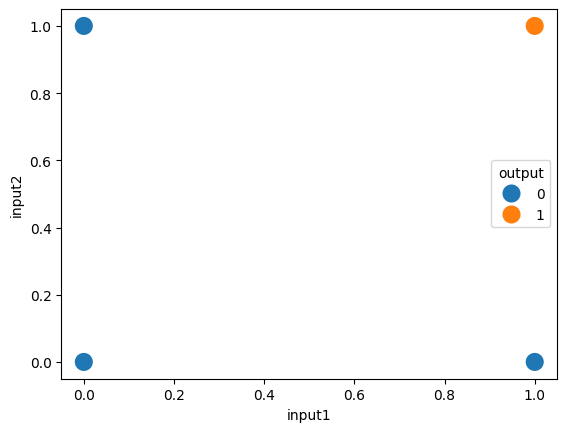

In [14]:
sns.scatterplot(x=and_data['input1'], y=and_data['input2'], hue=and_data['output'], s=200)

In [18]:
from sklearn.linear_model import Perceptron
clf1 = Perceptron()
clf2 = Perceptron()
clf3 = Perceptron()

In [21]:
clf1.fit(and_data.iloc[:,0:2].values,and_data.iloc[:,-1].values)
clf2.fit(or_data.iloc[:,0:2].values,or_data.iloc[:,-1].values)
clf3.fit(xor_data.iloc[:,0:2].values,xor_data.iloc[:,-1].values)

Perceptron()

In [23]:
print(clf1.intercept_)
print(clf1.coef_)

[-2.]
[[2. 2.]]


In [26]:
x = np.linspace(-1,1,5)
y = -x + 1

<Axes: xlabel='input1', ylabel='input2'>

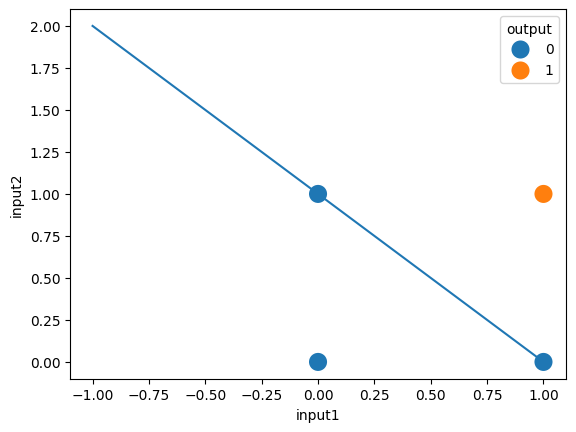

In [27]:
plt.plot(x,y)
sns.scatterplot(x=and_data['input1'], y=and_data['input2'], hue=and_data['output'], s=200)

In [30]:
print(clf2.intercept_)
print(clf2.coef_)

[-1.]
[[2. 2.]]


In [28]:
x1 = np.linspace(-1,1,5)
y1 = -x + 0.5

<Axes: xlabel='input1', ylabel='input2'>

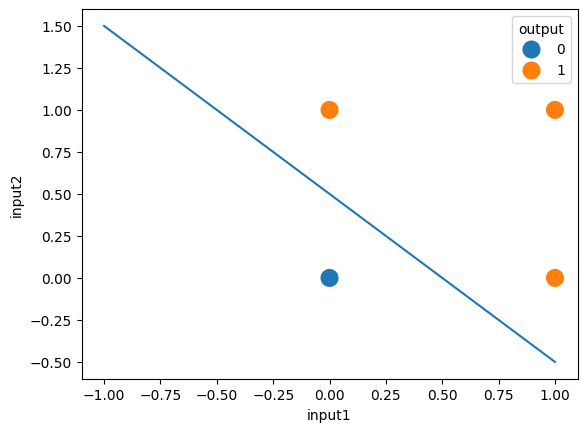

In [29]:
plt.plot(x1,y1)
sns.scatterplot(x=or_data['input1'], y=or_data['input2'], hue=or_data['output'], s=200)

In [31]:
print(clf3.intercept_)
print(clf3.coef_)

[0.]
[[0. 0.]]


<Axes: >

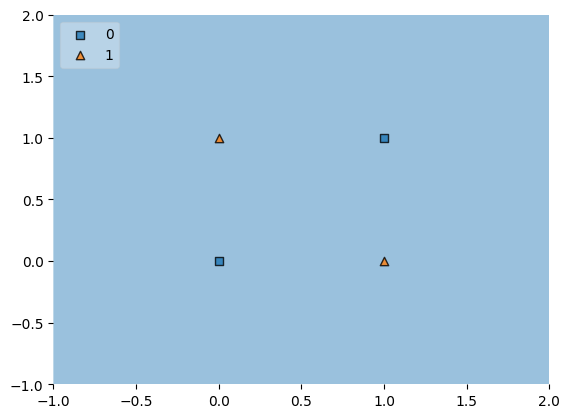

In [33]:
plot_decision_regions(xor_data.iloc[:,0:2].values,xor_data.iloc[:,-1].values,clf=clf3,legend=2)